# DATA PROCESSING 

In [1]:
import pandas as pd 
import numpy as np
import datetime
import re

## 1. CONSTRUCTION D'UN BASE AVEC TOUTES LES CLASSES ATC

In [2]:
medic_2020 = pd.read_excel('total_cip_2020.xlsx')

In [3]:
class_4 = pd.read_excel('classe_4.xlsx')
class_3 = pd.read_excel('classe_3.xlsx')

In [4]:
medic_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14372 entries, 0 to 14371
Data columns (total 27 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   CIP13                                  14372 non-null  object 
 1   NOM COURT                              14372 non-null  object 
 2   PRODUIT                                14372 non-null  object 
 3   Code ATC2                              14372 non-null  object 
 4   Libellé ATC2                           14372 non-null  object 
 5   Code ATC5                              14372 non-null  object 
 6   Libellé ATC5                           14372 non-null  object 
 7   Code EphMRA                            14372 non-null  object 
 8   Classe EphMRA                          14372 non-null  object 
 9   Base de remboursement 2020-01          14372 non-null  float64
 10  Nombre de boites remboursées 
2020-01  14372 non-null  int64  
 11  Mo

In [5]:
medic_2020.isna().sum()

CIP13                                     0
NOM COURT                                 0
PRODUIT                                   0
Code ATC2                                 0
Libellé ATC2                              0
Code ATC5                                 0
Libellé ATC5                              0
Code EphMRA                               0
Classe EphMRA                             0
Base de remboursement 2020-01             0
Nombre de boites remboursées \n2020-01    0
Montant remboursé \n2020-01               0
Base de remboursement 2020-02             0
Nombre de boites remboursées \n2020-02    0
Montant remboursé \n2020-02               0
Base de remboursement 2020-03             0
Nombre de boites remboursées \n2020-03    0
Montant remboursé \n2020-03               0
Base de remboursement 2020-04             0
Nombre de boites remboursées \n2020-04    0
Montant remboursé \n2020-04               0
Base de remboursement 2020-05             0
Nombre de boites remboursées \n2

In [6]:
def act1_func(x):
    if x.startswith('A') == True:
        x = 'A:Système digestif et métabolisme'
    if x.startswith('B') == True:
        x = 'B:Sang et organes hématopoiétiques'
    if x.startswith('C') == True:
        x = 'C:ystème cardio-vasculaire'
    if x.startswith('D') == True:
        x = 'D:Dermatologie'
    if x.startswith('G') == True:
        x = 'G:Système génito-urinaire et hormones sexuelles'
    if x.startswith('H') == True:   
        x = "H:Hormones systémiques, à l'exclusion des hormones sexuelles et des insulines"
    if x.startswith('J') == True:    
        x = 'J:Anti-infectieux (usage systémique)'
    if x.startswith('L') == True:
        x = 'L:Antinéoplasiques et agents immunomodulants'
    if x.startswith('M') == True:   
        x ='M:Système musculo-squelettique'
    if x.startswith('N') == True:
        x = 'N:Système nerveux'
    if x.startswith('P') == True:
        x = 'P:Antiparasitaires, insecticides et répulsifs'
    if x.startswith('R') == True:
        x = 'R:Système respiratoire'
    if x.startswith('S') == True:
        x = 'S:Organes sensoriels'
    if x.startswith('V') == True:
        x = 'V:Divers'
    if x.startswith('W') == True:
        x = 'W:HOMEOPATHIE'
    return x

def act1_code_func(x):
    if x.startswith('A') == True:
        x = 'A'
    if x.startswith('B') == True:
        x = 'B'
    if x.startswith('C') == True:
        x = 'C'
    if x.startswith('D') == True:
        x = 'D'
    if x.startswith('G') == True:
        x = 'G'
    if x.startswith('H') == True:   
        x = "H"
    if x.startswith('J') == True:    
        x = 'J'
    if x.startswith('L') == True:
        x = 'L'
    if x.startswith('M') == True:   
        x ='M'
    if x.startswith('N') == True:
        x = 'N'
    if x.startswith('P') == True:
        x = 'P'
    if x.startswith('R') == True:
        x = 'R'
    if x.startswith('S') == True:
        x = 'S'
    if x.startswith('V') == True:
        x = 'V'
    if x.startswith('W') == True:
        x = 'W'
    return x

def act4_code_func(x):
    for j in list(class_4['Code ATC4'].unique()):
        if x.startswith(j) == True:
            x = j
        else:
            pass
    return x

def act3_code_func(x):
    for j in list(class_3['Code ATC3'].unique()):
        if x.startswith(j) == True:
            x = j
        else:
            pass
    return x

In [7]:
medic_2020['Code ATC1']= medic_2020['Code ATC2'].apply(act1_code_func)
medic_2020['Libellé ATC1']= medic_2020['Code ATC1'].apply(act1_func)
medic_2020['Code ATC4']= medic_2020['Code ATC5'].apply(act4_code_func)
medic_2020['Code ATC3']= medic_2020['Code ATC4'].apply(act3_code_func)


In [8]:
medic_list = pd.merge(medic_2020, class_4, on='Code ATC4')
medic_list_final = pd.merge(medic_list, class_3, on='Code ATC3')


In [9]:
cols = ['CIP13', 'NOM COURT', 'PRODUIT', 'Code ATC1', 'Libellé ATC1',
        'Code ATC2', 'Libellé ATC2','Code ATC3','Libellé ATC3',
        'Code ATC4', 'Libellé ATC4',
       'Code ATC5', 'Libellé ATC5', 'Code EphMRA', 'Classe EphMRA']

In [10]:
medic_list_final = medic_list_final[cols]
medic_list_final

,CIP13,NOM COURT,PRODUIT,Code ATC1,Libellé ATC1,Code ATC2,Libellé ATC2,Code ATC3,Libellé ATC3,Code ATC4,Libellé ATC4,Code ATC5,Libellé ATC5,Code EphMRA,Classe EphMRA
0,3400921604696,"YELLOX 0,9 MG/ML COLLYRE FL 1/5 ML",YELLOX,S,S:Organes sensoriels,S01,MEDICAMENTS OPHTALMOLOGIQUES,S01B,ANTIINFLAMMATOIRES,S01BC,ANTIINFLAMMATOIRES NON STEROIDIENS,S01BC11,BROMFENAC SODIUM SESQUIHYDRATE,S01R,ANTIINFLAMMATOIRES NON STEROIDIENS OPHTALMIQUES
1,3400933429591,"ACULAR 0,5% COLLYRE FL 5ML 1/5 ML",ACULAR,S,S:Organes sensoriels,S01,MEDICAMENTS OPHTALMOLOGIQUES,S01B,ANTIINFLAMMATOIRES,S01BC,ANTIINFLAMMATOIRES NON STEROIDIENS,S01BC05,KETOROLAC,S01R,ANTIINFLAMMATOIRES NON STEROIDIENS OPHTALMIQUES
2,3400933443498,"OCUFEN 0,03% COLLYRE UNIDOSE 20/0,4 ML",OCUFEN,S,S:Organes sensoriels,S01,MEDICAMENTS OPHTALMOLOGIQUES,S01B,ANTIINFLAMMATOIRES,S01BC,ANTIINFLAMMATOIRES NON STEROIDIENS,S01BC04,FLURBIPROFENE,S01R,ANTIINFLAMMATOIRES NON STEROIDIENS OPHTALMIQUES
3,3400933502614,"OCUFEN 0,03% COLLYRE UNIDOSE 50/0,4 ML",OCUFEN,S,S:Organes sensoriels,S01,MEDICAMENTS OPHTALMOLOGIQUES,S01B,ANTIINFLAMMATOIRES,S01BC,ANTIINFLAMMATOIRES NON STEROIDIENS,S01BC04,FLURBIPROFENE,S01R,ANTIINFLAMMATOIRES NON STEROIDIENS OPHTALMIQUES
4,3400934195389,"INDOCOLLYRE 0,1% COLLYRE FL 5ML 1/5 ML",INDOCOLLYRE,S,S:Organes sensoriels,S01,MEDICAMENTS OPHTALMOLOGIQUES,S01B,ANTIINFLAMMATOIRES,S01BC,ANTIINFLAMMATOIRES NON STEROIDIENS,S01BC01,INDOMETACINE,S01R,ANTIINFLAMMATOIRES NON STEROIDIENS OPHTALMIQUES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14367,3400937714884,HYDROSOL POLYVITAMINE PHARMADEVELOPEMENT SOL B...,HYDROSOL POLYVITAMINE PHARMADEVELOPEMENT,A,A:Système digestif et métabolisme,A11,VITAMINES,A11B,POLYVITAMINES NON ASSOCIEES,A11BA,POLYVITAMINES NON ASSOCIEES,A11BA,POLYVITAMINES NON ASSOCIEES,A11B4,AUTRES POLYVITAMINES SANS ELEMENTS MINERAUX
14368,3400939215457,RASILEZ HCT 300 MG/25 MG CPR 30,RASILEZ HYDROCHLOROTHIAZIDE,C,C:ystème cardio-vasculaire,C09,MEDICAMENTS AGISSANT SUR LE SYSTEME RENINE-ANG...,C09X,AUTRES MEDICAMENTS AGISSANT SUR LE SYSTEME REN...,C09XA,INHIBITEURS DE LA RENINE,C09XA52,ALISKIREN ET HYDROCHLOROTHIAZIDE,C09X,AUTRES MEDICAMENTS AGISSANT SUR LE SYSTEME REN...
14369,3400939482255,DIOSMECTITE MYL 3G PDR SUSP BUV 30,DIOSMECTITE MYL,A,A:Système digestif et métabolisme,A07,"ANTIDIARRHEIQUES, ANTIINFLAMMATOIRES ET ANTIIN...",A07B,ADSORBANTS INTESTINAUX,A07BC,AUTRES ADSORBANTS INTESTINAUX,A07BC05,DIOSMECTITE,A02A1,ANTIACIDES NON ASSOCIES
14370,3400939482316,DIOSMECTITE MYL 3G PDR SUSP BUV 0,DIOSMECTITE MYL,A,A:Système digestif et métabolisme,A07,"ANTIDIARRHEIQUES, ANTIINFLAMMATOIRES ET ANTIIN...",A07B,ADSORBANTS INTESTINAUX,A07BC,AUTRES ADSORBANTS INTESTINAUX,A07BC05,DIOSMECTITE,A02A1,ANTIACIDES NON ASSOCIES


In [11]:
medic_list_final.to_excel('medic_list_final.xlsx', index = False)


## 2. CONSTITUTION D'UNE BASE DE DONNÉE DE 2010 À 2020

In [4]:

hosp_2020 = pd.read_excel('2020_1ersem_hosp.xlsx')
ville_2020 = pd.read_excel('2020_1ersem_ville.xlsx')

In [5]:
hosp_2020

,CIP13,NOM COURT,PRODUIT,Code EphMRA,Classe EphMRA,Code\nATC,Classe\nATC,Code\nATC 2,Libellé\nATC 2,Base de remboursement_Hosp 2020-01,...,Montant remboursé_Hosp \n2020-03,Base de remboursement_Hosp 2020-04,Nombre de boites remboursées_Hosp\n2020-04,Montant remboursé_Hosp \n2020-04,Base de remboursement_Hosp 2020-05,Nombre de boites remboursées_Hosp\n2020-05,Montant remboursé_Hosp\n2020-05,Base de remboursement_Hosp 2020-06,Nombre de boites remboursées_Hosp\n2020-06,Montant remboursé_Hosp \n2020-06
0,3400921604696,"YELLOX 0,9 MG/ML COLLYRE FL 1/5 ML",YELLOX,S01R,ANTIINFLAMMATOIRES NON STEROIDIENS OPHTALMIQUES,S01BC11,BROMFENAC SODIUM SESQUIHYDRATE,S01,MEDICAMENTS OPHTALMOLOGIQUES,4.237060e+03,...,2.467769e+03,5.758000e+02,158,4.019130e+02,1.412330e+03,388,9.827995e+02,4.436000e+03,1216,3.057679e+03
1,3400921608199,ESOMEPRAZOLE BIOGARAN 20 MG CPR GASTRORESISTAN...,ESOMEPRAZOLE BIOGARAN,A02B2,INHIBITEURS DE LA POMPE A PROTONS,A02BC05,ESOMEPRAZOLE,A02,MEDICAMENTS POUR LES TROUBLES DE L'ACIDITE,1.006000e+01,...,0.000000e+00,0.000000e+00,0,0.000000e+00,2.012000e+01,4,1.483850e+01,1.006000e+01,2,6.539000e+00
2,3400921609080,"AVONEX 30 MCG/0,5 ML SOL INJ STYLO 4/0,5 ML",AVONEX,L03B2,"INTERFERONS, BETA",L03AB07,INTERFERON BETA-1A,L03,IMMUNOSTIMULANTS,8.766343e+05,...,1.009955e+06,8.297673e+05,1197,8.209065e+05,8.108034e+05,1168,8.021848e+05,9.294432e+05,1340,9.227284e+05
3,3400921609370,ESOMEPRAZOLE BIOGARAN 40 MG CPR GASTRORESISTAN...,ESOMEPRAZOLE BIOGARAN,A02B2,INHIBITEURS DE LA POMPE A PROTONS,A02BC05,ESOMEPRAZOLE,A02,MEDICAMENTS POUR LES TROUBLES DE L'ACIDITE,0.000000e+00,...,0.000000e+00,0.000000e+00,0,0.000000e+00,0.000000e+00,0,0.000000e+00,2.700000e+00,1,1.755000e+00
4,3400921609660,ESOMEPRAZOLE BIOGARAN 40 MG CPR GASTRORESISTAN...,ESOMEPRAZOLE BIOGARAN,A02B2,INHIBITEURS DE LA POMPE A PROTONS,A02BC05,ESOMEPRAZOLE,A02,MEDICAMENTS POUR LES TROUBLES DE L'ACIDITE,1.509000e+01,...,0.000000e+00,0.000000e+00,0,0.000000e+00,0.000000e+00,0,0.000000e+00,0.000000e+00,0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12888,3400949980994,EXEMESTANE BIOGARAN 25 MG CPR 30,EXEMESTANE BIOGARAN,L02B3,INHIBITEURS DE L'AROMATASE CYTOSTATIQUES,L02BG06,EXEMESTANE,L02,THERAPEUTIQUE ENDOCRINE,4.131200e+02,...,2.287500e+02,4.575000e+02,10,4.575000e+02,4.265300e+02,9,4.265300e+02,2.287500e+02,5,2.287500e+02
12889,3400949991822,MONTELUKAST EG 5 MG CPR 28,MONTELUKAST EG,R03J2,ANTIASTHMATIQUES ANTAGONISTES DES LEUCOTRIENES...,R03DC03,MONTELUKAST,R03,MEDICAMENTS POUR LES SYNDROMES OBSTRUCTIFS DES...,2.526570e+03,...,2.315782e+03,2.555740e+03,231,1.753000e+03,2.218830e+03,201,1.528035e+03,2.608590e+03,234,1.819383e+03
12890,3400949998685,MONTELUKAST EG 10 MG CPR 28,MONTELUKAST EG,R03J2,ANTIASTHMATIQUES ANTAGONISTES DES LEUCOTRIENES...,R03DC03,MONTELUKAST,R03,MEDICAMENTS POUR LES SYNDROMES OBSTRUCTIFS DES...,9.710150e+03,...,1.005220e+04,9.775670e+03,881,7.702390e+03,9.394020e+03,848,7.455812e+03,1.070798e+04,967,8.392832e+03
12891,Homéopathie,Homéopathie,Homéopathie,V03X,TOUS AUTRES PRODUITS THERAPEUTIQUES,WHOMEO,HOMEOPATHIE,W99,SPECIALITES HOMEOPATHIQUES,6.377952e+05,...,1.720656e+05,4.352953e+05,242323,1.263205e+05,4.482755e+05,245264,1.259497e+05,5.879514e+05,318038,1.597546e+05


In [308]:
# creation d'une fonction qui met les valeurs date en ligne
def transpose_dates(df):

    df.columns = [" ".join(col.replace("\n", " ").split()) for col in df.columns]


    common_cols = []
    monthly_cols = []
    datetime_list = []
    for col in df.columns:
        try:
            date_str = re.search("\d{4}-\d{2}$", col).group(0)
            datetime_list.append(datetime.datetime.strptime(date_str, "%Y-%m"))
            monthly_cols.append(col.replace(date_str, ""))
        except:
            common_cols.append(col)
    datetime_list = list(set(datetime_list))
    monthly_cols = list(set(monthly_cols))

    new_df_list = []
    for date_time in datetime_list:
        new_df = df[common_cols]
        new_df["date"] = date_time.date()
        for col_to_add in monthly_cols:
            new_df[col_to_add] = df[col_to_add + date_time.strftime("%Y-%m")]
        new_df_list.append(new_df)
    new_df = pd.concat(new_df_list)
    return(new_df)

In [18]:
hosp_2020= transpose_dates(hosp_2020)
ville_2020 =transpose_dates(ville_2020)

<ipython-input-7-83cada414f7f>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["date"] = date_time.date()
<ipython-input-7-83cada414f7f>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[col_to_add] = df[col_to_add + date_time.strftime("%Y-%m")]


In [19]:
ville_2020.head(4)

,CIP13,NOM COURT,PRODUIT,Code EphMRA,Classe EphMRA,Code ATC,Classe ATC,Code ATC 2,Libellé ATC 2,date,Nombre de boites remboursées,Base de remboursement,Montant remboursé
0,3400921604696,"YELLOX 0,9 MG/ML COLLYRE FL 1/5 ML",YELLOX,S01R,ANTIINFLAMMATOIRES NON STEROIDIENS OPHTALMIQUES,S01BC11,BROMFENAC SODIUM SESQUIHYDRATE,S01,MEDICAMENTS OPHTALMOLOGIQUES,2020-01-01,7318,26773.65,18626.5625
1,3400921604757,ESOMEPRAZOLE RPG 20 MG CPR GASTRORESISTANT 7,ESOMEPRAZOLE RPG,A02B2,INHIBITEURS DE LA POMPE A PROTONS,A02BC05,ESOMEPRAZOLE,A02,MEDICAMENTS POUR LES TROUBLES DE L'ACIDITE,2020-01-01,0,0.00,0.0000
2,3400921604818,ESOMEPRAZOLE RPG 20 MG CPR GASTRORESISTANT 14,ESOMEPRAZOLE RPG,A02B2,INHIBITEURS DE LA POMPE A PROTONS,A02BC05,ESOMEPRAZOLE,A02,MEDICAMENTS POUR LES TROUBLES DE L'ACIDITE,2020-01-01,0,0.00,0.0000
3,3400921605068,ESOMEPRAZOLE RPG 20 MG CPR GASTRORESISTANT 28,ESOMEPRAZOLE RPG,A02B2,INHIBITEURS DE LA POMPE A PROTONS,A02BC05,ESOMEPRAZOLE,A02,MEDICAMENTS POUR LES TROUBLES DE L'ACIDITE,2020-01-01,0,0.00,0.0000


In [8]:
hosp_2020.columns

Index(['CIP13', 'NOM COURT', 'PRODUIT', 'Code EphMRA', 'Classe EphMRA',
       'Code ATC', 'Classe ATC', 'Code ATC 2', 'Libellé ATC 2', 'date',
       'Base de remboursement_Hosp ', 'Montant remboursé_Hosp ',
       'Nombre de boites remboursées_Hosp '],
      dtype='object')

In [20]:
ville_2020.rename(columns = {'Montant remboursé ':'Montant remboursé_Ville',
                                     'Nombre de boites remboursées ': 'Nombre de boites remboursées_Ville',
                                   'Base de remboursement ': 'Base de remboursement_Ville' }, inplace = True)
hosp_2020.rename(columns = {'Montant remboursé_Hosp ':'Montant remboursé_Hosp',
                                     'Nombre de boites remboursées_Hosp ': 'Nombre de boites remboursées_Hosp',
                                   'Base de remboursement_Hosp ': 'Base de remboursement_Hosp' }, inplace = True)

In [21]:
year_2020=pd.merge(hosp_2020,ville_2020, on =['CIP13','NOM COURT', 'PRODUIT', 'Code EphMRA', 'Classe EphMRA',
       'Code ATC', 'Classe ATC', 'Code ATC 2', 'Libellé ATC 2','date'], how='inner')

In [22]:
year_2020.head(4)

,CIP13,NOM COURT,PRODUIT,Code EphMRA,Classe EphMRA,Code ATC,Classe ATC,Code ATC 2,Libellé ATC 2,date,Nombre de boites remboursées_Hosp,Montant remboursé_Hosp,Base de remboursement_Hosp,Nombre de boites remboursées_Ville,Base de remboursement_Ville,Montant remboursé_Ville
0,3400921604696,"YELLOX 0,9 MG/ML COLLYRE FL 1/5 ML",YELLOX,S01R,ANTIINFLAMMATOIRES NON STEROIDIENS OPHTALMIQUES,S01BC11,BROMFENAC SODIUM SESQUIHYDRATE,S01,MEDICAMENTS OPHTALMOLOGIQUES,2020-01-01,1168,2918.9555,4237.06,7318,26773.65,18626.5625
1,3400921608199,ESOMEPRAZOLE BIOGARAN 20 MG CPR GASTRORESISTAN...,ESOMEPRAZOLE BIOGARAN,A02B2,INHIBITEURS DE LA POMPE A PROTONS,A02BC05,ESOMEPRAZOLE,A02,MEDICAMENTS POUR LES TROUBLES DE L'ACIDITE,2020-01-01,2,8.2995,10.06,5,25.15,16.3475
2,3400921609080,"AVONEX 30 MCG/0,5 ML SOL INJ STYLO 4/0,5 ML",AVONEX,L03B2,"INTERFERONS, BETA",L03AB07,INTERFERON BETA-1A,L03,IMMUNOSTIMULANTS,2020-01-01,1263,867789.7150,876634.30,1260,874406.99,868132.7615
3,3400921609370,ESOMEPRAZOLE BIOGARAN 40 MG CPR GASTRORESISTAN...,ESOMEPRAZOLE BIOGARAN,A02B2,INHIBITEURS DE LA POMPE A PROTONS,A02BC05,ESOMEPRAZOLE,A02,MEDICAMENTS POUR LES TROUBLES DE L'ACIDITE,2020-01-01,0,0.0000,0.00,0,0.00,0.0000


In [12]:
year_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75594 entries, 0 to 75593
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   CIP13                               75594 non-null  object 
 1   NOM COURT                           75588 non-null  object 
 2   PRODUIT                             75588 non-null  object 
 3   Code EphMRA                         75588 non-null  object 
 4   Classe EphMRA                       75588 non-null  object 
 5   Code ATC                            75588 non-null  object 
 6   Classe ATC                          75588 non-null  object 
 7   Code ATC 2                          75588 non-null  object 
 8   Libellé ATC 2                       75588 non-null  object 
 9   date                                75594 non-null  object 
 10  Base de remboursement_Hosp          75594 non-null  float64
 11  Montant remboursé_Hosp              75594

In [23]:
year_2020.drop(['NOM COURT', 'PRODUIT', 'Code EphMRA', 'Classe EphMRA',
       'Code ATC', 'Classe ATC', 'Code ATC 2', 'Libellé ATC 2'], axis=1, inplace=True)

In [14]:
year_2020.to_excel('1ersem_2020.xlsx', index = False)

In [ ]:
#on refait les mêmes manipulation pour les dataframe 2019 et 2018

In [28]:
df_ville_1er_2019 = pd.read_excel('2019_1ersem_vile.xlsx')
df_hosp_1er_2019 = pd.read_excel('2019_1ersem_hosp.xlsx')

In [29]:
df_hosp_1er_2019.head(4)

,CIP13,NOM COURT,PRODUIT,Code EphMRA,Classe EphMRA,Code\nATC,Classe\nATC,Code\nATC 2,Libellé\nATC 2,Base de remboursement 2019-01,...,Montant remboursé \n2019-03,Base de remboursement 2019-04,Nombre de boites remboursées \n2019-04,Montant remboursé \n2019-04,Base de remboursement 2019-05,Nombre de boites remboursées \n2019-05,Montant remboursé \n2019-05,Base de remboursement 2019-06,Nombre de boites remboursées \n2019-06,Montant remboursé \n2019-06
0,3400921604696,"YELLOX 0,9 MG/ML COLLYRE FL 1/5 ML",YELLOX,S01R,ANTIINFLAMMATOIRES NON STEROIDIENS OPHTALMIQUES,S01BC11,BROMFENAC SODIUM SESQUIHYDRATE,S01,MEDICAMENTS OPHTALMOLOGIQUES,5973.27,...,4132.5685,6023.91,1598,4167.9495,4831.14,1287,3338.526,4748.34,1265,3244.9245
1,3400921605068,ESOMEPRAZOLE RPG 20 MG CPR GASTRORESISTANT 28,ESOMEPRAZOLE RPG,A02B2,INHIBITEURS DE LA POMPE A PROTONS,A02BC05,ESOMEPRAZOLE,A02,MEDICAMENTS POUR LES TROUBLES DE L'ACIDITE,0.00,...,0.0000,5.24,1,5.2400,0.00,0,0.000,0.00,0,0.0000
2,3400921608199,ESOMEPRAZOLE BIOGARAN 20 MG CPR GASTRORESISTAN...,ESOMEPRAZOLE BIOGARAN,A02B2,INHIBITEURS DE LA POMPE A PROTONS,A02BC05,ESOMEPRAZOLE,A02,MEDICAMENTS POUR LES TROUBLES DE L'ACIDITE,0.00,...,0.0000,0.00,0,0.0000,5.24,1,5.240,0.00,0,0.0000
3,3400921609080,"AVONEX 30 MCG/0,5 ML SOL INJ STYLO 4/0,5 ML",AVONEX,L03B2,"INTERFERONS, BETA",L03AB07,INTERFERON BETA-1A,L03,IMMUNOSTIMULANTS,1014752.62,...,891345.7450,960824.44,1372,946536.4290,918014.36,1312,907809.836,889228.52,1270,878295.4210


In [30]:
df_ville_1er_2019 = transpose_dates(df_ville_1er_2019)

<ipython-input-14-83cada414f7f>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["date"] = date_time.date()
<ipython-input-14-83cada414f7f>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[col_to_add] = df[col_to_add + date_time.strftime("%Y-%m")]


In [31]:
df_hosp_1er_2019 = transpose_dates(df_hosp_1er_2019)

<ipython-input-14-83cada414f7f>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["date"] = date_time.date()
<ipython-input-14-83cada414f7f>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[col_to_add] = df[col_to_add + date_time.strftime("%Y-%m")]


In [32]:
df_ville_1er_2019.rename(columns = {'Montant remboursé ':'Montant remboursé_Ville',
                                     'Nombre de boites remboursées ': 'Nombre de boites remboursées_Ville',
                                   'Base de remboursement ': 'Base de remboursement_Ville' }, inplace = True)

In [33]:
df_hosp_1er_2019.rename(columns = {'Montant remboursé ':'Montant remboursé_Hosp',
                                     'Nombre de boites remboursées ': 'Nombre de boites remboursées_Hosp',
                                   'Base de remboursement ': 'Base de remboursement_Hosp' }, inplace = True)

In [34]:
Sem1_2019=pd.merge(df_hosp_1er_2019,df_ville_1er_2019, on =['CIP13','NOM COURT', 'PRODUIT', 'Code EphMRA', 'Classe EphMRA',
       'Code ATC', 'Classe ATC', 'Code ATC 2', 'Libellé ATC 2','date'], how='inner')

In [35]:
Sem1_2019.drop(['NOM COURT', 'PRODUIT', 'Code EphMRA', 'Classe EphMRA',
       'Code ATC', 'Classe ATC', 'Code ATC 2', 'Libellé ATC 2'], axis=1, inplace=True)

In [36]:
df_ville_2eme_2019 = pd.read_excel('2019_2emesem_vile.xlsx')
df_hosp_2eme_2019 = pd.read_excel('2019_2emesem_hosp.xlsx')

In [37]:
df_ville_2eme_2019=transpose_dates(df_ville_2eme_2019)
df_hosp_2eme_2019=transpose_dates(df_hosp_2eme_2019)

<ipython-input-14-83cada414f7f>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["date"] = date_time.date()
<ipython-input-14-83cada414f7f>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[col_to_add] = df[col_to_add + date_time.strftime("%Y-%m")]


In [38]:
Sem1_2019.head(4)

,CIP13,date,Nombre de boites remboursées_Hosp,Base de remboursement_Hosp,Montant remboursé_Hosp,Nombre de boites remboursées_Ville,Base de remboursement_Ville,Montant remboursé_Ville
0,3400921604696,2019-01-01,1604,5973.27,4.086165e+03,9923,37089.23,25623.643
1,3400921605068,2019-01-01,0,0.00,0.000000e+00,1,5.98,3.887
2,3400921608199,2019-01-01,0,0.00,0.000000e+00,4,23.92,17.641
3,3400921609080,2019-01-01,1424,1014752.62,1.003338e+06,1430,1016783.99,1007561.854


In [39]:
df_ville_2eme_2019.rename(columns = {'Montant remboursé ':'Montant remboursé_Ville',
                                     'Nombre de boites remboursées ': 'Nombre de boites remboursées_Ville',
                                   'Base de remboursement ': 'Base de remboursement_Ville' }, inplace = True)
df_hosp_2eme_2019.rename(columns = {'Montant remboursé ':'Montant remboursé_Hosp',
                                     'Nombre de boites remboursées ': 'Nombre de boites remboursées_Hosp',
                                   'Base de remboursement ': 'Base de remboursement_Hosp' }, inplace = True)

In [44]:
Sem2_2019=pd.merge(df_hosp_2eme_2019,df_ville_2eme_2019, on =['CIP13','NOM COURT', 'PRODUIT', 'Code EphMRA', 'Classe EphMRA',
       'Code ATC', 'Classe ATC', 'Code ATC 2', 'Libellé ATC 2','date'], how='inner')

In [45]:
Sem2_2019.drop(['NOM COURT', 'PRODUIT', 'Code EphMRA', 'Classe EphMRA',
       'Code ATC', 'Classe ATC', 'Code ATC 2', 'Libellé ATC 2'], axis=1, inplace=True)

In [46]:
year_2019=pd.concat([Sem1_2019, Sem2_2019], axis=0)

In [ ]:
year_2019.to_excel('year_2019.xlsx', index = False)

In [4]:
df_ville_2eme_2020 = pd.read_excel('2020_2emesem_ville.xlsx')
df_hosp_2eme_2020 = pd.read_excel('2020_2emesem_hosp.xlsx')

In [9]:
df_ville_2eme_2020 = transpose_dates(df_ville_2eme_2020)
df_hosp_2eme_2020 = transpose_dates(df_hosp_2eme_2020)


<ipython-input-7-83cada414f7f>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["date"] = date_time.date()
<ipython-input-7-83cada414f7f>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[col_to_add] = df[col_to_add + date_time.strftime("%Y-%m")]


In [12]:
df_hosp_2eme_2020.head()

,CIP13,NOM COURT,PRODUIT,Code EphMRA,Classe EphMRA,Code ATC,Classe ATC,Code ATC 2,Libellé ATC 2,date,Nombre de boites remboursées,Base de remboursement,Montant remboursé
0,3400921604696,"YELLOX 0,9 MG/ML COLLYRE FL 1/5 ML",YELLOX,S01R,ANTIINFLAMMATOIRES NON STEROIDIENS OPHTALMIQUES,S01BC11,BROMFENAC SODIUM SESQUIHYDRATE,S01,MEDICAMENTS OPHTALMOLOGIQUES,2020-07-01,1148,4252.62,2954.2595
1,3400921608199,ESOMEPRAZOLE BIOGARAN 20 MG CPR GASTRORESISTAN...,ESOMEPRAZOLE BIOGARAN,A02B2,INHIBITEURS DE LA POMPE A PROTONS,A02BC05,ESOMEPRAZOLE,A02,MEDICAMENTS POUR LES TROUBLES DE L'ACIDITE,2020-07-01,5,25.15,16.3475
2,3400921609080,"AVONEX 30 MCG/0,5 ML SOL INJ STYLO 4/0,5 ML",AVONEX,L03B2,"INTERFERONS, BETA",L03AB07,INTERFERON BETA-1A,L03,IMMUNOSTIMULANTS,2020-07-01,1373,952714.60,943576.9000
3,3400921609370,ESOMEPRAZOLE BIOGARAN 40 MG CPR GASTRORESISTAN...,ESOMEPRAZOLE BIOGARAN,A02B2,INHIBITEURS DE LA POMPE A PROTONS,A02BC05,ESOMEPRAZOLE,A02,MEDICAMENTS POUR LES TROUBLES DE L'ACIDITE,2020-07-01,0,0.00,0.0000
4,3400921609660,ESOMEPRAZOLE BIOGARAN 40 MG CPR GASTRORESISTAN...,ESOMEPRAZOLE BIOGARAN,A02B2,INHIBITEURS DE LA POMPE A PROTONS,A02BC05,ESOMEPRAZOLE,A02,MEDICAMENTS POUR LES TROUBLES DE L'ACIDITE,2020-07-01,1,5.03,3.2695


In [13]:
df_ville_2eme_2020.rename(columns = {'Montant remboursé ':'Montant remboursé_Ville',
                                     'Nombre de boites remboursées ': 'Nombre de boites remboursées_Ville',
                                   'Base de remboursement ': 'Base de remboursement_Ville' }, inplace = True)
df_hosp_2eme_2020.rename(columns = {'Montant remboursé ':'Montant remboursé_Hosp',
                                     'Nombre de boites remboursées ': 'Nombre de boites remboursées_Hosp',
                                   'Base de remboursement ': 'Base de remboursement_Hosp' }, inplace = True)

In [14]:
Sem2_2020=pd.merge(df_hosp_2eme_2020,df_ville_2eme_2020, on =['CIP13','NOM COURT', 'PRODUIT', 'Code EphMRA', 'Classe EphMRA',
       'Code ATC', 'Classe ATC', 'Code ATC 2', 'Libellé ATC 2','date'], how='inner')

In [15]:
Sem2_2020.drop(['NOM COURT', 'PRODUIT', 'Code EphMRA', 'Classe EphMRA',
       'Code ATC', 'Classe ATC', 'Code ATC 2', 'Libellé ATC 2'], axis=1, inplace=True)

In [24]:
year_2020=pd.concat([year_2020, Sem2_2020], axis=0)

In [26]:
year_2020.head()

,CIP13,date,Nombre de boites remboursées_Hosp,Montant remboursé_Hosp,Base de remboursement_Hosp,Nombre de boites remboursées_Ville,Base de remboursement_Ville,Montant remboursé_Ville
0,3400921604696,2020-01-01,1168,2918.9555,4237.06,7318,26773.65,18626.5625
1,3400921608199,2020-01-01,2,8.2995,10.06,5,25.15,16.3475
2,3400921609080,2020-01-01,1263,867789.7150,876634.30,1260,874406.99,868132.7615
3,3400921609370,2020-01-01,0,0.0000,0.00,0,0.00,0.0000
4,3400921609660,2020-01-01,3,13.3295,15.09,12,60.36,49.7970


In [28]:
year_2020.to_excel('year_2020_total.xlsx', index = False)

In [10]:
#données 2018
df_ville_1er_2018 = pd.read_excel('2018_1ersem_vile.xlsx')
df_hosp_1er_2018 = pd.read_excel('2018_1ersem_hosp.xlsx')
df_ville_2eme_2018 = pd.read_excel('2018_2emesem_vile.xlsx')
df_hosp_2eme_2018 = pd.read_excel('2018_2emesem_hosp.xlsx')

In [11]:
df_ville_1er_2018 = transpose_dates(df_ville_1er_2018)
df_hosp_1er_2018 = transpose_dates(df_hosp_1er_2018)
df_ville_2eme_2018 = transpose_dates(df_ville_2eme_2018)
df_hosp_2eme_2018 = transpose_dates(df_hosp_2eme_2018)

<ipython-input-7-83cada414f7f>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["date"] = date_time.date()
<ipython-input-7-83cada414f7f>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[col_to_add] = df[col_to_add + date_time.strftime("%Y-%m")]


In [49]:
df_hosp_1er_2018.head()

,CIP13,NOM COURT,PRODUIT,Code EphMRA,Classe EphMRA,Code ATC,Classe ATC,Code ATC 2,Libellé ATC 2,date,Nombre de boites remboursées,Base de remboursement,Montant remboursé
0,3400921604696,"YELLOX 0,9 MG/ML COLLYRE FL 1/5 ML",YELLOX,S01R,ANTIINFLAMMATOIRES NON STEROIDIENS OPHTALMIQUES,S01BC11,BROMFENAC SODIUM SESQUIHYDRATE,S01,MEDICAMENTS OPHTALMOLOGIQUES,2018-02-01,3095.0,11667.30,8.098294e+03
1,3400921607888,ESOMEPRAZOLE BIOGARAN 20 MG CPR GASTRORESISTANT 7,ESOMEPRAZOLE BIOGARAN,A02B2,INHIBITEURS DE LA POMPE A PROTONS,A02BC05,ESOMEPRAZOLE,A02,MEDICAMENTS POUR LES TROUBLES DE L'ACIDITE,2018-02-01,2.0,3.38,2.788500e+00
2,3400921607949,ESOMEPRAZOLE BIOGARAN 20 MG CPR GASTRORESISTAN...,ESOMEPRAZOLE BIOGARAN,A02B2,INHIBITEURS DE LA POMPE A PROTONS,A02BC05,ESOMEPRAZOLE,A02,MEDICAMENTS POUR LES TROUBLES DE L'ACIDITE,2018-02-01,0.0,0.00,0.000000e+00
3,3400921608199,ESOMEPRAZOLE BIOGARAN 20 MG CPR GASTRORESISTAN...,ESOMEPRAZOLE BIOGARAN,A02B2,INHIBITEURS DE LA POMPE A PROTONS,A02BC05,ESOMEPRAZOLE,A02,MEDICAMENTS POUR LES TROUBLES DE L'ACIDITE,2018-02-01,0.0,0.00,0.000000e+00
4,3400921609080,"AVONEX 30 MCG/0,5 ML SOL INJ STYLO 4/0,5 ML",AVONEX,L03B2,"INTERFERONS, BETA",L03AB07,INTERFERON BETA-1A,L03,IMMUNOSTIMULANTS,2018-02-01,1334.0,1040211.22,1.026981e+06


In [50]:
df_ville_2eme_2018.rename(columns = {'Montant remboursé ':'Montant remboursé_Ville',
                                     'Nombre de boites remboursées ': 'Nombre de boites remboursées_Ville',
                                   'Base de remboursement ': 'Base de remboursement_Ville' }, inplace = True)
df_hosp_2eme_2018.rename(columns = {'Montant remboursé ':'Montant remboursé_Hosp',
                                     'Nombre de boites remboursées ': 'Nombre de boites remboursées_Hosp',
                                   'Base de remboursement ': 'Base de remboursement_Hosp' }, inplace = True)
df_ville_1er_2018.rename(columns = {'Montant remboursé ':'Montant remboursé_Ville',
                                     'Nombre de boites remboursées ': 'Nombre de boites remboursées_Ville',
                                   'Base de remboursement ': 'Base de remboursement_Ville' }, inplace = True)
df_hosp_1er_2018.rename(columns = {'Montant remboursé ':'Montant remboursé_Hosp',
                                     'Nombre de boites remboursées ': 'Nombre de boites remboursées_Hosp',
                                   'Base de remboursement ': 'Base de remboursement_Hosp' }, inplace = True)

In [51]:
Sem1_2018=pd.merge(df_hosp_1er_2018,df_ville_1er_2018, on =['CIP13','NOM COURT', 'PRODUIT', 'Code EphMRA', 'Classe EphMRA',
       'Code ATC', 'Classe ATC', 'Code ATC 2', 'Libellé ATC 2','date'], how='inner')
Sem2_2018=pd.merge(df_hosp_2eme_2018,df_ville_2eme_2018, on =['CIP13','NOM COURT', 'PRODUIT', 'Code EphMRA', 'Classe EphMRA',
       'Code ATC', 'Classe ATC', 'Code ATC 2', 'Libellé ATC 2','date'], how='inner')


In [52]:
Sem1_2018.drop(['NOM COURT', 'PRODUIT', 'Code EphMRA', 'Classe EphMRA',
       'Code ATC', 'Classe ATC', 'Code ATC 2', 'Libellé ATC 2'], axis=1, inplace=True)
Sem2_2018.drop(['NOM COURT', 'PRODUIT', 'Code EphMRA', 'Classe EphMRA',
       'Code ATC', 'Classe ATC', 'Code ATC 2', 'Libellé ATC 2'], axis=1, inplace=True)

In [53]:
year_2018=pd.concat([Sem1_2018, Sem2_2018], axis=0)

In [54]:
year_2018.to_excel('year_2018.xlsx', index = False)

## 3.Création du dataset final

In [339]:
year_2018_2020=pd.concat([year_2018, year_2019,year_2020], axis=0)

In [160]:
year_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423780 entries, 0 to 114641
Data columns (total 8 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   CIP13                               423768 non-null  object        
 1   date                                423780 non-null  datetime64[ns]
 2   Nombre de boites remboursées_Hosp   423756 non-null  float64       
 3   Base de remboursement_Hosp          423756 non-null  float64       
 4   Montant remboursé_Hosp              423756 non-null  float64       
 5   Nombre de boites remboursées_Ville  423756 non-null  float64       
 6   Base de remboursement_Ville         423756 non-null  float64       
 7   Montant remboursé_Ville             423756 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 29.1+ MB


In [ ]:
year_total =year_total.dropna()

In [321]:
year_2018= pd.read_excel('year_2018.xlsx')
year_2019= pd.read_excel('year_2019.xlsx')
year_2020= pd.read_excel('year_2020_total.xlsx')

In [5]:
year_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423780 entries, 0 to 114641
Data columns (total 8 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   CIP13                               423768 non-null  object        
 1   date                                423780 non-null  datetime64[ns]
 2   Nombre de boites remboursées_Hosp   423756 non-null  float64       
 3   Base de remboursement_Hosp          423756 non-null  float64       
 4   Montant remboursé_Hosp              423756 non-null  float64       
 5   Nombre de boites remboursées_Ville  423756 non-null  float64       
 6   Base de remboursement_Ville         423756 non-null  float64       
 7   Montant remboursé_Ville             423756 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 29.1+ MB


In [377]:
medic_list_final= pd.read_excel('medic_list_final.xlsx')

In [15]:
medic_list_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14372 entries, 0 to 14371
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CIP13          14372 non-null  object
 1   NOM COURT      14372 non-null  object
 2   PRODUIT        14372 non-null  object
 3   Code ATC1      14372 non-null  object
 4   Libellé ATC1   14372 non-null  object
 5   Code ATC2      14372 non-null  object
 6   Libellé ATC2   14372 non-null  object
 7   Code ATC3      14372 non-null  object
 8   Libellé ATC3   14372 non-null  object
 9   Code ATC4      14372 non-null  object
 10  Libellé ATC4   14372 non-null  object
 11  Code ATC5      14372 non-null  object
 12  Libellé ATC5   14372 non-null  object
 13  Code EphMRA    14372 non-null  object
 14  Classe EphMRA  14372 non-null  object
dtypes: object(15)
memory usage: 1.6+ MB


In [162]:
df_medic= medic_list_final.merge(year_total, left_on = 'CIP13', right_on= 'CIP13', how = 'left')


In [163]:
df_medic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407443 entries, 0 to 407442
Data columns (total 22 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   CIP13                               407443 non-null  object        
 1   NOM COURT                           407443 non-null  object        
 2   PRODUIT                             407443 non-null  object        
 3   Code ATC1                           407443 non-null  object        
 4   Libellé ATC1                        407443 non-null  object        
 5   Code ATC2                           407443 non-null  object        
 6   Libellé ATC2                        407443 non-null  object        
 7   Code ATC3                           407443 non-null  object        
 8   Libellé ATC3                        407443 non-null  object        
 9   Code ATC4                           407443 non-null  object        
 10  Libellé 

In [165]:
df_medic =df_medic.dropna()

In [12]:
df_medic.head()

,CIP13,NOM COURT,PRODUIT,Code ATC1,Libellé ATC1,Code ATC2,Libellé ATC2,Code ATC3,Libellé ATC3,Code ATC4,...,Libellé ATC5,Code EphMRA,Classe EphMRA,date,Nombre de boites remboursées_Hosp,Base de remboursement_Hosp,Montant remboursé_Hosp,Nombre de boites remboursées_Ville,Base de remboursement_Ville,Montant remboursé_Ville
0,3400921604696,"YELLOX 0,9 MG/ML COLLYRE FL 1/5 ML",YELLOX,S,S:Organes sensoriels,S01,MEDICAMENTS OPHTALMOLOGIQUES,S01B,ANTIINFLAMMATOIRES,S01BC,...,BROMFENAC SODIUM SESQUIHYDRATE,S01R,ANTIINFLAMMATOIRES NON STEROIDIENS OPHTALMIQUES,2018-02-01,3095.0,11667.30,8098.2940,13412.0,51231.26,35371.3065
1,3400921604696,"YELLOX 0,9 MG/ML COLLYRE FL 1/5 ML",YELLOX,S,S:Organes sensoriels,S01,MEDICAMENTS OPHTALMOLOGIQUES,S01B,ANTIINFLAMMATOIRES,S01BC,...,BROMFENAC SODIUM SESQUIHYDRATE,S01R,ANTIINFLAMMATOIRES NON STEROIDIENS OPHTALMIQUES,2018-04-01,2814.0,10689.82,7355.6410,12725.0,48628.54,33497.0460
2,3400921604696,"YELLOX 0,9 MG/ML COLLYRE FL 1/5 ML",YELLOX,S,S:Organes sensoriels,S01,MEDICAMENTS OPHTALMOLOGIQUES,S01B,ANTIINFLAMMATOIRES,S01BC,...,BROMFENAC SODIUM SESQUIHYDRATE,S01R,ANTIINFLAMMATOIRES NON STEROIDIENS OPHTALMIQUES,2018-06-01,2469.0,9371.05,6515.9935,12924.0,49353.43,34027.8980
3,3400921604696,"YELLOX 0,9 MG/ML COLLYRE FL 1/5 ML",YELLOX,S,S:Organes sensoriels,S01,MEDICAMENTS OPHTALMOLOGIQUES,S01B,ANTIINFLAMMATOIRES,S01BC,...,BROMFENAC SODIUM SESQUIHYDRATE,S01R,ANTIINFLAMMATOIRES NON STEROIDIENS OPHTALMIQUES,2018-01-01,3256.0,12223.76,8481.8660,14093.0,53665.53,37048.0970
4,3400921604696,"YELLOX 0,9 MG/ML COLLYRE FL 1/5 ML",YELLOX,S,S:Organes sensoriels,S01,MEDICAMENTS OPHTALMOLOGIQUES,S01B,ANTIINFLAMMATOIRES,S01BC,...,BROMFENAC SODIUM SESQUIHYDRATE,S01R,ANTIINFLAMMATOIRES NON STEROIDIENS OPHTALMIQUES,2018-03-01,3143.0,11870.08,8291.8700,14072.0,53689.94,37031.4075


In [161]:
year_total['CIP13'] = year_total['CIP13'].astype(str)

In [164]:
df_medic.isna().sum()

CIP13                                   0
NOM COURT                               0
PRODUIT                                 0
Code ATC1                               0
Libellé ATC1                            0
Code ATC2                               0
Libellé ATC2                            0
Code ATC3                               0
Libellé ATC3                            0
Code ATC4                               0
Libellé ATC4                            0
Code ATC5                               0
Libellé ATC5                            0
Code EphMRA                             0
Classe EphMRA                           0
date                                  631
Nombre de boites remboursées_Hosp     631
Base de remboursement_Hosp            631
Montant remboursé_Hosp                631
Nombre de boites remboursées_Ville    631
Base de remboursement_Ville           631
Montant remboursé_Ville               631
dtype: int64

In [ ]:
#rajout de features : 
#total montant remboursée
#Total Nombre de boites remboursées
#Total Base de remboursement

In [171]:
df_medic['Total montant remboursé'] = df_medic['Montant remboursé_Hosp']+df_medic['Montant remboursé_Ville']

In [170]:
df_medic['Total Nombre de boites remboursées'] = df_medic['Nombre de boites remboursées_Hosp']+df_medic['Nombre de boites remboursées_Ville']

In [169]:
df_medic['Total Base de remboursement'] = df_medic['Base de remboursement_Hosp']+df_medic['Base de remboursement_Ville']

In [166]:
df_medic['Nombre de boites remboursées_Hosp']= np.where(df_medic['Nombre de boites remboursées_Hosp'] < 0, 0, 
                                                 df_medic['Nombre de boites remboursées_Hosp'])
df_medic['Nombre de boites remboursées_Ville']= np.where(df_medic['Nombre de boites remboursées_Ville'] < 0, 0, 
                                                 df_medic['Nombre de boites remboursées_Ville'])

In [ ]:
#suppression de valeur négative

In [167]:
df_medic['Base de remboursement_Hosp']= np.where(df_medic['Base de remboursement_Hosp'] < 0, 0, 
                                                 df_medic['Base de remboursement_Hosp'])
df_medic['Base de remboursement_Ville']= np.where(df_medic['Base de remboursement_Ville'] < 0, 0, 
                                                 df_medic['Base de remboursement_Ville'])

In [168]:
df_medic['Montant remboursé_Hosp']= np.where(df_medic['Montant remboursé_Hosp'] < 0, 0, 
                                                 df_medic['Montant remboursé_Hosp'])
df_medic['Montant remboursé_Ville']= np.where(df_medic['Montant remboursé_Ville'] < 0, 0, 
                                                 df_medic['Montant remboursé_Ville'])

In [175]:
df_medic['Prix Unitaire']= df_medic['Total Base de remboursement'] / df_medic['Total Nombre de boites remboursées']

In [176]:
df_medic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406812 entries, 0 to 407441
Data columns (total 27 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   CIP13                               406812 non-null  object        
 1   NOM COURT                           406812 non-null  object        
 2   PRODUIT                             406812 non-null  object        
 3   Code ATC1                           406812 non-null  object        
 4   Libellé ATC1                        406812 non-null  object        
 5   Code ATC2                           406812 non-null  object        
 6   Libellé ATC2                        406812 non-null  object        
 7   Code ATC3                           406812 non-null  object        
 8   Libellé ATC3                        406812 non-null  object        
 9   Code ATC4                           406812 non-null  object        
 10  Libellé 

In [217]:
#calcul de prix unitaire

def calculate_price(x):
    return x['Total montant remboursé'].sum()/ x['Total Nombre de boites remboursées'].sum()



In [218]:
def calculate_rbtx(y):
    return y['Total montant remboursé'].sum()/ ['Total Base de remboursement'].sum()




In [189]:
#calcul du taux de rembousement
df_medic['year'] = df_medic.date.dt.year


In [267]:
price = pd.DataFrame(df_medic.groupby(['year', 'CIP13']).apply(calculate_price)).reset_index()
remb = pd.DataFrame(df_medic.groupby(['year', 'CIP13']).apply(calculate_rbtx)).reset_index()

<ipython-input-217-bafb649f63c2>:2: RuntimeWarning: invalid value encountered in double_scalars
  return x['Total montant remboursé'].sum()/ x['Total Nombre de boites remboursées'].sum()
<ipython-input-217-bafb649f63c2>:2: RuntimeWarning: divide by zero encountered in double_scalars
  return x['Total montant remboursé'].sum()/ x['Total Nombre de boites remboursées'].sum()


In [268]:



df_medic_total = df_medic.merge(price, left_on = ['CIP13', 'year'], right_on= ['CIP13', 'year'], how = 'left').merge(remb, left_on = ['CIP13', 'year'], right_on= ['CIP13', 'year'], how = 'left')


In [269]:
df_medic_total = df_medic_total.rename(columns={"0_x": "Prix unitaire", "0_y": "Taux remboursement"}, errors="raise")

In [289]:
len(df_medic_total[df_medic_total['Taux remboursement'].isna()])

18

In [290]:
df_medic_total['Prix unitaire']= np.where(df_medic_total['Prix unitaire'].isna() == True, 0, 
                                                 df_medic_total['Prix unitaire'])
df_medic_total['Taux remboursement']= np.where(df_medic_total['Taux remboursement'].isna() == True, 0, 
                                                 df_medic_total['Taux remboursement'])

In [291]:
df_medic_total.describe()

,Nombre de boites remboursées_Hosp,Base de remboursement_Hosp,Montant remboursé_Hosp,Nombre de boites remboursées_Ville,Base de remboursement_Ville,Montant remboursé_Ville,Total Base de remboursement,Total Nombre de boites remboursées,Total montant remboursé,year,Prix unitaire,Taux remboursement
count,4.068120e+05,4.068120e+05,4.068120e+05,4.068120e+05,4.068120e+05,4.068120e+05,4.068120e+05,4.068120e+05,4.068120e+05,406812.000000,406812.000000,406812.000000
mean,2.244157e+03,5.585013e+04,5.224050e+04,1.327512e+04,9.821953e+04,7.883324e+04,1.540697e+05,1.551928e+04,1.310737e+05,2018.928291,84.005294,0.788051
std,1.655424e+04,4.253611e+05,4.162489e+05,1.162731e+05,5.546186e+05,5.039712e+05,8.614709e+05,1.318846e+05,8.135560e+05,0.792779,674.000765,0.175878
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2018.000000,0.000000,0.000000
25%,2.100000e+01,2.029575e+02,1.596420e+02,9.300000e+01,1.406835e+03,1.076060e+03,1.916918e+03,1.530000e+02,1.460089e+03,2018.000000,2.933120,0.717239
50%,1.910000e+02,1.789920e+03,1.411267e+03,1.144000e+03,1.182931e+04,8.932770e+03,1.548278e+04,1.495000e+03,1.171485e+04,2019.000000,5.583097,0.815692
75%,1.034000e+03,1.054530e+04,8.368288e+03,6.211250e+03,5.288483e+04,3.968994e+04,7.052171e+04,7.511000e+03,5.335593e+04,2020.000000,14.834745,0.912802
max,1.767100e+06,1.840190e+07,1.835316e+07,1.317541e+07,2.968961e+07,2.967043e+07,4.100437e+07,1.494251e+07,4.093871e+07,2020.000000,46585.483925,5.872017


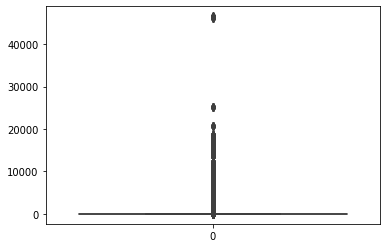

In [295]:
import seaborn as sns
sns.boxplot(data=df_medic_total['Prix unitaire'])

In [21]:
df_medic.to_csv('df_medic.csv', index = False)

In [ ]:
df_medic.to_excel('df_medic.xlsx', index = False)


In [25]:
with pd.ExcelWriter('df_medic_bis.xlsx') as writer:
    df_medic.to_excel(writer)

# RAJOUT DES DONNEES _ 2017 to 2010

In [300]:
df_medic = pd.read_csv('df_medic.csv')

In [301]:
df_medic.head()

,CIP13,NOM COURT,PRODUIT,Code ATC1,Libellé ATC1,Code ATC2,Libellé ATC2,Code ATC3,Libellé ATC3,Code ATC4,...,Classe EphMRA,date,Nombre de boites remboursées_Hosp,Montant remboursé_Hosp,Nombre de boites remboursées_Ville,Montant remboursé_Ville,Tx de Remboursement_Ville,Tx de Remboursement_Hosp,Total montant remboursé,Total Nombre de boites remboursées
0,3400921604696,"YELLOX 0,9 MG/ML COLLYRE FL 1/5 ML",YELLOX,S,S:Organes sensoriels,S01,MEDICAMENTS OPHTALMOLOGIQUES,S01B,ANTIINFLAMMATOIRES,S01BC,...,ANTIINFLAMMATOIRES NON STEROIDIENS OPHTALMIQUES,2018-02-01,3095.0,8098.2940,13412.0,35371.3065,69.042429,69.410181,43469.6005,16507.0
1,3400921604696,"YELLOX 0,9 MG/ML COLLYRE FL 1/5 ML",YELLOX,S,S:Organes sensoriels,S01,MEDICAMENTS OPHTALMOLOGIQUES,S01B,ANTIINFLAMMATOIRES,S01BC,...,ANTIINFLAMMATOIRES NON STEROIDIENS OPHTALMIQUES,2018-04-01,2814.0,7355.6410,12725.0,33497.0460,68.883512,68.809774,40852.6870,15539.0
2,3400921604696,"YELLOX 0,9 MG/ML COLLYRE FL 1/5 ML",YELLOX,S,S:Organes sensoriels,S01,MEDICAMENTS OPHTALMOLOGIQUES,S01B,ANTIINFLAMMATOIRES,S01BC,...,ANTIINFLAMMATOIRES NON STEROIDIENS OPHTALMIQUES,2018-06-01,2469.0,6515.9935,12924.0,34027.8980,68.947382,69.533227,40543.8915,15393.0
3,3400921604696,"YELLOX 0,9 MG/ML COLLYRE FL 1/5 ML",YELLOX,S,S:Organes sensoriels,S01,MEDICAMENTS OPHTALMOLOGIQUES,S01B,ANTIINFLAMMATOIRES,S01BC,...,ANTIINFLAMMATOIRES NON STEROIDIENS OPHTALMIQUES,2018-01-01,3256.0,8481.8660,14093.0,37048.0970,69.035183,69.388355,45529.9630,17349.0
4,3400921604696,"YELLOX 0,9 MG/ML COLLYRE FL 1/5 ML",YELLOX,S,S:Organes sensoriels,S01,MEDICAMENTS OPHTALMOLOGIQUES,S01B,ANTIINFLAMMATOIRES,S01BC,...,ANTIINFLAMMATOIRES NON STEROIDIENS OPHTALMIQUES,2018-03-01,3143.0,8291.8700,14072.0,37031.4075,68.972712,69.855216,45323.2775,17215.0


In [316]:
df_2017_1ersem = pd.read_excel('2017_1ersem.xlsx')
df_2017_2emesem = pd.read_excel('2017_2emesem.xlsx')
df_2016_1ersem = pd.read_excel('2016_1ersem.xlsx')
df_2016_2emesem = pd.read_excel('2016_2emesem.xlsx')
df_2015_1ersem = pd.read_excel('2015_1ersem.xlsx')
df_2015_2emesem = pd.read_excel('2015_2emesem.xlsx')

In [307]:
df_2014_1ersem = pd.read_excel('2014_1ersem.xlsx')
df_2014_2emesem = pd.read_excel('2014_2emesem.xlsx')
df_2013_1ersem = pd.read_excel('2013_1ersem.xlsx')
df_2013_2emesem = pd.read_excel('2013_2emesem.xlsx')
df_2012_1ersem = pd.read_excel('2012_1ersem.xlsx')
df_2012_2emesem = pd.read_excel('2012_2emsem.xlsx')

In [306]:
df_2011_1ersem = pd.read_excel('2011_1ersem.xlsx')
df_2011_2emesem = pd.read_excel('2011_2emesem.xlsx')
df_2010_1ersem = pd.read_excel('2010_1ersem.xlsx')
df_2010_2emesem = pd.read_excel('2010_2emesem.xlsx')

In [317]:
df_2017_1ersem = transpose_dates(df_2017_1ersem)
df_2017_2emesem = transpose_dates(df_2017_2emesem)
df_2016_1ersem = transpose_dates(df_2016_1ersem)
df_2016_2emesem = transpose_dates(df_2016_2emesem)
df_2015_1ersem = transpose_dates(df_2015_1ersem)
df_2015_2emesem = transpose_dates(df_2015_2emesem)
df_2014_1ersem = transpose_dates(df_2014_1ersem)
df_2014_2emesem = transpose_dates(df_2014_2emesem)
df_2013_1ersem = transpose_dates(df_2013_1ersem)
df_2013_2emesem = transpose_dates(df_2013_2emesem)
df_2012_1ersem = transpose_dates(df_2012_1ersem)
df_2012_2emesem = transpose_dates(df_2012_2emesem)
df_2011_1ersem = transpose_dates(df_2011_1ersem)
df_2011_2emesem = transpose_dates(df_2011_2emesem)
df_2010_1ersem = transpose_dates(df_2010_1ersem)
df_2010_2emesem = transpose_dates(df_2010_2emesem)

<ipython-input-308-83cada414f7f>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["date"] = date_time.date()
<ipython-input-308-83cada414f7f>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[col_to_add] = df[col_to_add + date_time.strftime("%Y-%m")]


In [318]:
 df_2016_1ersem.head()

,CIP13,NOM COURT,PRODUIT,Code ATC2,Libellé ATC2,Code ATC5,Libellé ATC5,Code EphMRA,Classe EphMRA,date,Nombre de boites remboursées,Base de remboursement,Montant remboursé
0,3400921600506,MONTELUKAST PHR LAB 5 MG CPR 28,MONTELUKAST PHR LAB,R03,MEDICAMENTS POUR LES SYNDROMES OBSTRUCTIFS DES...,R03DC03,MONTELUKAST,R03J2,ANTIASTHMATIQUES ANTAGONISTES DES LEUCOTRIENES...,2016-03-01,0,0.0,0.0000
1,3400921601916,MONTELUKAST PHR LAB 10 MG CPR 28,MONTELUKAST PHR LAB,R03,MEDICAMENTS POUR LES SYNDROMES OBSTRUCTIFS DES...,R03DC03,MONTELUKAST,R03J2,ANTIASTHMATIQUES ANTAGONISTES DES LEUCOTRIENES...,2016-03-01,31,443.3,303.1600
2,3400921604177,RIBAVIRINE ZENTIVA 200 MG CPR 28,RIBAVIRINE ZENTIVA,J05,ANTIVIRAUX A USAGE SYSTEMIQUE,J05AB04,RIBAVIRINE,J05B1,MEDICAMENTS CONTRE L'HEPATITE VIRALE,2016-03-01,10,553.4,553.4000
3,3400921604696,"YELLOX 0,9 MG/ML COLLYRE FL 1/5 ML",YELLOX,S01,MEDICAMENTS OPHTALMOLOGIQUES,S01BC11,BROMFENAC SODIUM SESQUIHYDRATE,S01R,ANTIINFLAMMATOIRES NON STEROIDIENS OPHTALMIQUES,2016-03-01,22959,107167.7,73647.8155
4,3400921604757,ESOMEPRAZOLE RPG 20 MG CPR GASTRORESISTANT 7,ESOMEPRAZOLE RPG,A02,MEDICAMENTS POUR LES TROUBLES DE L'ACIDITE,A02BC05,ESOMEPRAZOLE,A02B2,INHIBITEURS DE LA POMPE A PROTONS,2016-03-01,0,0.0,0.0000


In [320]:
year_2017=pd.concat([df_2017_1ersem, df_2017_2emesem], axis=0)
year_2016=pd.concat([df_2016_1ersem, df_2016_2emesem], axis=0)
year_2015=pd.concat([df_2015_1ersem, df_2015_2emesem], axis=0)
year_2014=pd.concat([df_2014_1ersem, df_2014_2emesem], axis=0)
year_2013=pd.concat([df_2013_1ersem, df_2013_2emesem], axis=0)
year_2012=pd.concat([df_2012_1ersem, df_2012_2emesem], axis=0)
year_2011=pd.concat([df_2011_1ersem, df_2011_2emesem], axis=0)
year_2010=pd.concat([df_2010_1ersem, df_2010_2emesem], axis=0)

In [333]:
df =[year_2017, year_2016, year_2015, year_2014, year_2013, year_2012, year_2011, year_2010]
year_2017.drop(['NOM COURT', 'PRODUIT', 'Code ATC2', 'Libellé ATC2',
       'Code ATC5', 'Libellé ATC5', 'Code EphMRA', 'Classe EphMRA'], axis=1, inplace=True)

In [334]:
year_2016.drop(['NOM COURT', 'PRODUIT', 'Code ATC2', 'Libellé ATC2',
       'Code ATC5', 'Libellé ATC5', 'Code EphMRA', 'Classe EphMRA'], axis=1, inplace=True)
year_2015.drop(['NOM COURT', 'PRODUIT', 'Code ATC2', 'Libellé ATC2',
       'Code ATC5', 'Libellé ATC5', 'Code EphMRA', 'Classe EphMRA'], axis=1, inplace=True)
year_2014.drop(['NOM COURT', 'PRODUIT', 'Code ATC2', 'Libellé ATC2',
       'Code ATC5', 'Libellé ATC5', 'Code EphMRA', 'Classe EphMRA'], axis=1, inplace=True)
year_2013.drop(['NOM COURT', 'PRODUIT', 'Code ATC2', 'Libellé ATC2',
       'Code ATC5', 'Libellé ATC5', 'Code EphMRA', 'Classe EphMRA'], axis=1, inplace=True)
year_2012.drop(['NOM COURT', 'PRODUIT', 'Code ATC2', 'Libellé ATC2',
       'Code ATC5', 'Libellé ATC5', 'Code EphMRA', 'Classe EphMRA'], axis=1, inplace=True)
year_2011.drop(['NOM COURT', 'PRODUIT', 'Code ATC2', 'Libellé ATC2',
       'Code ATC5', 'Libellé ATC5', 'Code EphMRA', 'Classe EphMRA'], axis=1, inplace=True)
year_2010.drop(['NOM COURT', 'PRODUIT', 'Code ATC2', 'Libellé ATC2',
       'Code ATC5', 'Libellé ATC5', 'Code EphMRA', 'Classe EphMRA'], axis=1, inplace=True)

In [348]:
year_2018_2020['Base de remboursement ']=year_2018_2020['Base de remboursement_Hosp']+year_2018_2020['Base de remboursement_Ville']

In [349]:
year_2018_2020['Montant remboursé ']=year_2018_2020['Montant remboursé_Hosp']+year_2018_2020['Montant remboursé_Ville']

In [360]:
year_2017.rename({'Nombre de boites remboursées ':'Nombre de boites remboursées',
       'Base de remboursement ':'Base de remboursement', 'Montant remboursé ':'Montant remboursé'}, axis=1,inplace=True)

In [370]:
year_2016.rename({'Nombre de boites remboursées ':'Nombre de boites remboursées',
       'Base de remboursement ':'Base de remboursement', 'Montant remboursé ':'Montant remboursé'}, axis=1,inplace=True)
year_2015.rename({'Nombre de boites remboursées ':'Nombre de boites remboursées',
       'Base de remboursement ':'Base de remboursement', 'Montant remboursé ':'Montant remboursé'}, axis=1,inplace=True)
year_2014.rename({'Nombre de boites remboursées ':'Nombre de boites remboursées',
       'Base de remboursement ':'Base de remboursement', 'Montant remboursé ':'Montant remboursé'}, axis=1,inplace=True)
year_2013.rename({'Nombre de boites remboursées ':'Nombre de boites remboursées',
       'Base de remboursement ':'Base de remboursement', 'Montant remboursé ':'Montant remboursé'}, axis=1,inplace=True)
year_2012.rename({'Nombre de boites remboursées ':'Nombre de boites remboursées',
       'Base de remboursement ':'Base de remboursement', 'Montant remboursé ':'Montant remboursé'}, axis=1,inplace=True)
year_2011.rename({'Nombre de boites remboursées ':'Nombre de boites remboursées',
       'Base de remboursement ':'Base de remboursement', 'Montant remboursé ':'Montant remboursé'}, axis=1,inplace=True)
year_2010.rename({'Nombre de boites remboursées ':'Nombre de boites remboursées',
       'Base de remboursement ':'Base de remboursement', 'Montant remboursé ':'Montant remboursé'}, axis=1,inplace=True)

In [352]:
year_2018_2020.drop(['Nombre de boites remboursées_Hosp',
       'Base de remboursement_Hosp', 'Montant remboursé_Hosp',
       'Nombre de boites remboursées_Ville', 'Base de remboursement_Ville',
       'Montant remboursé_Ville'], axis=1, inplace= True)

In [402]:
year_total=pd.concat([year_2018_2020, year_2017, year_2016, year_2015, year_2014, year_2013, year_2012, year_2011, year_2010], axis=0)

In [417]:
year_2018_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423780 entries, 0 to 114641
Data columns (total 5 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   CIP13                         423768 non-null  object        
 1   date                          423780 non-null  datetime64[ns]
 2   Nombre de boites remboursées  423756 non-null  float64       
 3   Base de remboursement         423756 non-null  float64       
 4   Montant remboursé             423756 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 19.4+ MB


In [403]:
year_total['CIP13'] = year_total['CIP13'].astype(str)

In [400]:
year_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 604500 entries, 0 to 15059
Data columns (total 5 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   CIP13                         604500 non-null  object 
 1   date                          604500 non-null  object 
 2   Nombre de boites remboursées  604476 non-null  float64
 3   Base de remboursement         604476 non-null  float64
 4   Montant remboursé             604476 non-null  float64
dtypes: float64(3), object(2)
memory usage: 27.7+ MB


In [405]:
year_total = year_total.dropna()

In [404]:
year_total.isna().sum()

CIP13                            0
date                             0
Nombre de boites remboursées    24
Base de remboursement           24
Montant remboursé               24
dtype: int64

In [406]:
year_total.head()

,CIP13,date,Nombre de boites remboursées,Base de remboursement,Montant remboursé
0,3400921604696,2018-02-01 00:00:00,16507.0,62898.56,4.346960e+04
1,3400921607888,2018-02-01 00:00:00,2.0,3.38,2.788500e+00
2,3400921608199,2018-02-01 00:00:00,2.0,12.74,4.140500e+00
3,3400921609080,2018-02-01 00:00:00,2699.0,2103641.72,2.079781e+06
4,3400921609370,2018-02-01 00:00:00,0.0,0.00,0.000000e+00


In [407]:
df_medic= medic_list_final.merge(year_total, left_on = 'CIP13', right_on= 'CIP13', how = 'left')

In [429]:
df_medic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1371396 entries, 0 to 1371526
Data columns (total 19 columns):
 #   Column                        Non-Null Count    Dtype         
---  ------                        --------------    -----         
 0   CIP13                         1371396 non-null  object        
 1   NOM COURT                     1371396 non-null  object        
 2   PRODUIT                       1371396 non-null  object        
 3   Code ATC1                     1371396 non-null  object        
 4   Libellé ATC1                  1371396 non-null  object        
 5   Code ATC2                     1371396 non-null  object        
 6   Libellé ATC2                  1371396 non-null  object        
 7   Code ATC3                     1371396 non-null  object        
 8   Libellé ATC3                  1371396 non-null  object        
 9   Code ATC4                     1371396 non-null  object        
 10  Libellé ATC4                  1371396 non-null  object        
 11

In [411]:
df_medic.isna().sum()

CIP13                             0
NOM COURT                         0
PRODUIT                           0
Code ATC1                         0
Libellé ATC1                      0
Code ATC2                         0
Libellé ATC2                      0
Code ATC3                         0
Libellé ATC3                      0
Code ATC4                         0
Libellé ATC4                      0
Code ATC5                         0
Libellé ATC5                      0
Code EphMRA                       0
Classe EphMRA                     0
date                            131
Nombre de boites remboursées    131
Base de remboursement           131
Montant remboursé               131
dtype: int64

In [412]:
df_medic = df_medic.dropna()

In [428]:
df_medic['date'] = pd.to_datetime(df_medic['date'])

In [426]:
df_medic['date'].tail()

1371522    2010-07-01
1371523    2010-10-01
1371524    2010-08-01
1371525    2010-12-01
1371526    2010-09-01
Name: date, dtype: object

In [430]:
df_medic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1371396 entries, 0 to 1371526
Data columns (total 19 columns):
 #   Column                        Non-Null Count    Dtype         
---  ------                        --------------    -----         
 0   CIP13                         1371396 non-null  object        
 1   NOM COURT                     1371396 non-null  object        
 2   PRODUIT                       1371396 non-null  object        
 3   Code ATC1                     1371396 non-null  object        
 4   Libellé ATC1                  1371396 non-null  object        
 5   Code ATC2                     1371396 non-null  object        
 6   Libellé ATC2                  1371396 non-null  object        
 7   Code ATC3                     1371396 non-null  object        
 8   Libellé ATC3                  1371396 non-null  object        
 9   Code ATC4                     1371396 non-null  object        
 10  Libellé ATC4                  1371396 non-null  object        
 11

In [431]:
df_medic.head()

,CIP13,NOM COURT,PRODUIT,Code ATC1,Libellé ATC1,Code ATC2,Libellé ATC2,Code ATC3,Libellé ATC3,Code ATC4,Libellé ATC4,Code ATC5,Libellé ATC5,Code EphMRA,Classe EphMRA,date,Nombre de boites remboursées,Base de remboursement,Montant remboursé
0,3400921604696,"YELLOX 0,9 MG/ML COLLYRE FL 1/5 ML",YELLOX,S,S:Organes sensoriels,S01,MEDICAMENTS OPHTALMOLOGIQUES,S01B,ANTIINFLAMMATOIRES,S01BC,ANTIINFLAMMATOIRES NON STEROIDIENS,S01BC11,BROMFENAC SODIUM SESQUIHYDRATE,S01R,ANTIINFLAMMATOIRES NON STEROIDIENS OPHTALMIQUES,2018-02-01,16507.0,62898.56,43469.6005
1,3400921604696,"YELLOX 0,9 MG/ML COLLYRE FL 1/5 ML",YELLOX,S,S:Organes sensoriels,S01,MEDICAMENTS OPHTALMOLOGIQUES,S01B,ANTIINFLAMMATOIRES,S01BC,ANTIINFLAMMATOIRES NON STEROIDIENS,S01BC11,BROMFENAC SODIUM SESQUIHYDRATE,S01R,ANTIINFLAMMATOIRES NON STEROIDIENS OPHTALMIQUES,2018-04-01,15539.0,59318.36,40852.6870
2,3400921604696,"YELLOX 0,9 MG/ML COLLYRE FL 1/5 ML",YELLOX,S,S:Organes sensoriels,S01,MEDICAMENTS OPHTALMOLOGIQUES,S01B,ANTIINFLAMMATOIRES,S01BC,ANTIINFLAMMATOIRES NON STEROIDIENS,S01BC11,BROMFENAC SODIUM SESQUIHYDRATE,S01R,ANTIINFLAMMATOIRES NON STEROIDIENS OPHTALMIQUES,2018-06-01,15393.0,58724.48,40543.8915
3,3400921604696,"YELLOX 0,9 MG/ML COLLYRE FL 1/5 ML",YELLOX,S,S:Organes sensoriels,S01,MEDICAMENTS OPHTALMOLOGIQUES,S01B,ANTIINFLAMMATOIRES,S01BC,ANTIINFLAMMATOIRES NON STEROIDIENS,S01BC11,BROMFENAC SODIUM SESQUIHYDRATE,S01R,ANTIINFLAMMATOIRES NON STEROIDIENS OPHTALMIQUES,2018-01-01,17349.0,65889.29,45529.9630
4,3400921604696,"YELLOX 0,9 MG/ML COLLYRE FL 1/5 ML",YELLOX,S,S:Organes sensoriels,S01,MEDICAMENTS OPHTALMOLOGIQUES,S01B,ANTIINFLAMMATOIRES,S01BC,ANTIINFLAMMATOIRES NON STEROIDIENS,S01BC11,BROMFENAC SODIUM SESQUIHYDRATE,S01R,ANTIINFLAMMATOIRES NON STEROIDIENS OPHTALMIQUES,2018-03-01,17215.0,65560.02,45323.2775


In [432]:
df_medic.to_csv('df_medic.csv', index = False)